In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('../src/')
import joblib
import matplotlib.pyplot as plt
import numpy as np
import torch
from dataset import BengaliDatasetTrain

In [3]:
from models import ResNet34, SEResNext50

In [4]:
model = ResNet34(pretrained=False); model

ResNet34(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [5]:
model = SEResNext50(pretrained=False); model

SEResNext50(
  (model): SENet(
    (layer0): Sequential(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    )
    (layer1): Sequential(
      (0): SEResNeXtBottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu):

In [3]:
dataset = BengaliDatasetTrain(folds=[0, 1], height=137, width=236,
                              mean=(0.485, 0.456, 0.406),
                              std=(0.229, 0.224, 0.225))

In [4]:
len(dataset)

80336

In [5]:
idx = 0
sample = dataset[idx]
print(sample['grapheme_root'])
print(sample['vowel_diacritic'])
print(sample['consonant_diacritic'])

tensor(43)
tensor(0)
tensor(3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


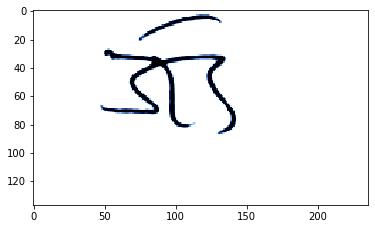

In [6]:
image = sample['image']
image_numpy = image.numpy()
plt.imshow(np.transpose(image_numpy, (1, 2, 0)));

In [7]:
from model_dispatcher import MODEL_DISPATCHER

In [8]:
model = MODEL_DISPATCHER['resnet34'](pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/isleof/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [9]:
sample = dataset[0]
image = sample['image']

In [12]:
model.eval()
with torch.no_grad():
    outputs = model(image.unsqueeze(0))

In [15]:
output0, output1, output2 = outputs

In [16]:
output0.shape, output1.shape, output2.shape

(torch.Size([1, 168]), torch.Size([1, 11]), torch.Size([1, 7]))

In [17]:
output0.numpy()

array([[-0.18533175,  0.5061485 , -0.73047274,  0.21021856, -0.1732751 ,
        -0.09349395,  0.11303742,  0.30812493,  0.34073347, -0.29381186,
         0.17331421,  0.14193319, -0.25522357,  0.22289127,  0.4251044 ,
         0.31625724,  0.69619524, -0.2588567 , -0.08423926,  0.20950232,
        -0.00506126, -0.532875  , -0.8830604 ,  0.3109751 ,  0.4819399 ,
         0.09411882, -0.11321069, -0.13751249,  0.34863555,  0.2637123 ,
         0.17317359,  0.04595682, -0.25411466,  0.04816725,  0.3140281 ,
        -0.11226311, -0.45147318, -0.02649609, -0.19410217,  0.06534287,
        -0.18964024,  0.41977534, -0.4226806 , -0.4045187 ,  0.37039447,
         0.22154196, -0.19872579,  0.19988841, -0.07986918,  1.2583929 ,
        -0.48246714,  0.07258964,  0.20701909,  0.21246256, -0.9048031 ,
        -0.38261732, -0.11411786, -0.45282063, -0.08399139,  0.125601  ,
         0.3912541 , -0.30537528,  0.7024575 , -0.09714377,  0.5465176 ,
        -0.592131  , -0.10907494, -0.5657805 ,  0.4

In [ ]:
target0 = sample[]